In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b1e4a9f41f370f6433e743042c29d908d0052c34ab8bd01c548946fad1f349dc
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [3]:
import pandas as pd
import numpy as np
from langdetect import detect

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
location ='drive/MyDrive/Datasets/AB_NYC_2019.csv'

Mounted at /content/drive


In [4]:
df = pd.read_csv(location)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Data cleaning
#1) Drop unnecessary columns
# here we don't see any columns that won't help in our project

#2) handling NULL values

# If there are comparatively less empty values we can just remove the row
df['name'].dropna(inplace = True) #Removes null values from original dataframe
df['host_name'].dropna(inplace = True)

#or we can replace empty values
df['last_review'].fillna('0000-00-00',inplace = True)
df['reviews_per_month'].fillna(0.00,inplace = True)

#3) handling values in wrong format

#if name is not in english then drop the row
for x in df.index:
  try:
    if detect(df.loc[x, "name"]) == 'en':
      continue
    else:
      df.drop(x, inplace = True)
  except:
    continue

#4) wrong values(posiblly typing errors)
#max value for availability_365 is 365
for x in df.index:
  if df.loc[x, "availability_365"] > 365:
    df.loc[x, "availability_365"] = 365

#The latitude must be a number between -90 and 90 and the longitude between -180 and 180.
for x in df.index:
  if (df.loc[x, "latitude"] > 90 or df.loc[x, "latitude"] < -90) and (df.loc[x, "longitude"] > 180 or df.loc[x, "longitude"] < -180):
    df.drop(x, inplace = True)

#5) Duplicate entries
df.drop_duplicates(inplace = True)

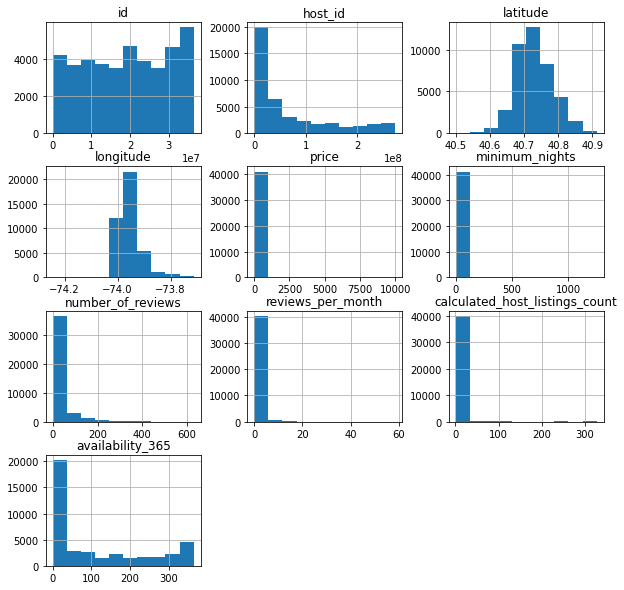

In [8]:
_ = df.hist(figsize=(10, 10))

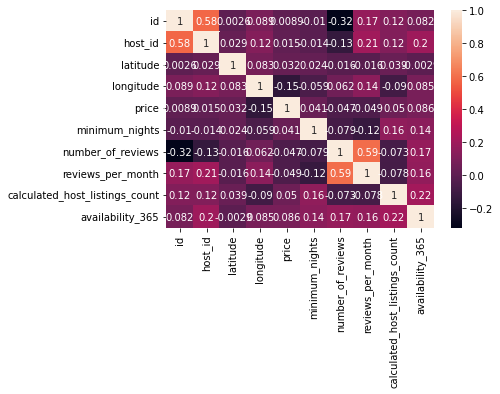

In [10]:
import seaborn as sns


corr_mx = df.corr()
sns.heatmap(corr_mx, annot=True)

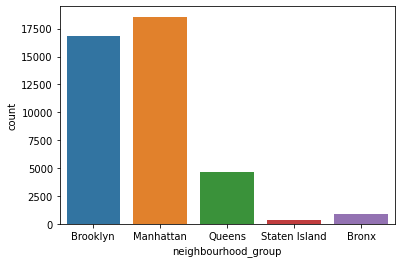

In [11]:
sns.countplot(
    x = 'neighbourhood_group', 
    data = df
);

In [12]:
pd.crosstab(df.neighbourhood_group, df.room_type)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,326,490,36
Brooklyn,8128,8379,343
Manhattan,11133,6991,438
Queens,1790,2704,162
Staten Island,153,164,8


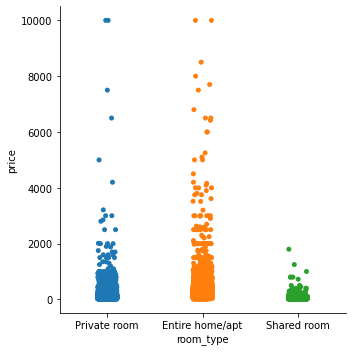

In [13]:
sns.catplot(x="room_type", y="price", data=df);

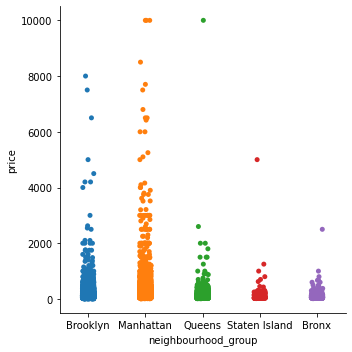

In [14]:
sns.catplot(x="neighbourhood_group", y="price", data=df);

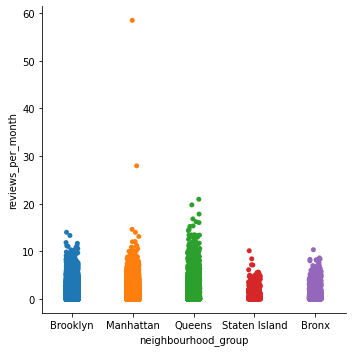

In [15]:
sns.catplot(x="neighbourhood_group", y="reviews_per_month", data=df);